In [1]:
import sys
sys.path.append("../../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import qat.lang.AQASM as qlm

In [3]:
#This cell loads the QLM solver.
#QLMaaS == False -> uses PyLinalg
#QLMaaS == True -> try to use LinAlg (for using QPU as CESGA QLM one)
from QQuantLib.utils.qlm_solver import get_qpu
QLMaaS = False
linalg_qpu = get_qpu(QLMaaS)

Using PyLinalg


In [4]:
#See 01_DataLoading_Module_Use for the use of this function
from QQuantLib.utils.data_extracting import get_results

In [5]:
def Loteria(n):
    #Max number of elememnts I can generate
    N_max = 2**n
    print('N_max: {}'.format(N_max))
    #Generate winner number
    Winner = np.random.randint(N_max)
    print('Winner: {}'.format(Winner))
    return Winner#, ToBinnary(Winner, n)

In [8]:
from QQuantLib.DL.data_loading import uniform_distribution
from QQuantLib.utils.utils import bitfield,  load_qn_gate
from QQuantLib.AA.amplitude_amplification import grover

In [7]:
n=5
Winner = Loteria(n)
Bit_Winner = list(bitfield(Winner, n))
print(Bit_Winner)

N_max: 32
Winner: 17
[1, 0, 0, 0, 1]


In [18]:
UD = uniform_distribution(n)

%qatdisplay UD --depth 1 --svg
#Operador de Grover
grover_gate = grover(
    UD,
    Bit_Winner,
    [i for i,_ in enumerate(reflection3_register)]
)

%qatdisplay grover_gate --depth 1 --svg

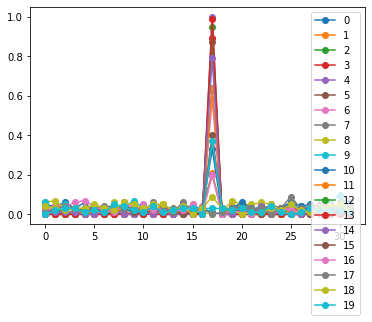

In [35]:
MaxTimes = 20
ProbabilityWinner = []
ListOfWinners = []
for times in range(MaxTimes):
    reflection3 = qlm.QRoutine()
    reflection3_register = reflection3.new_wires(n)
    #Distribución equiprobable de estadps
    reflection3.apply(UD, reflection3_register)
    reflection3.apply(load_qn_gate(grover_gate, times), reflection3_register)
    pdf, circuit, q_prog, job = get_results(reflection3, linalg_qpu, shots=100)
    plt.plot(pdf['Int_lsb'], pdf['Probability'], 'o-')
    ProbabilityWinner.append(pdf[pdf['Int_lsb']==Winner]['Probability'])
    ListOfWinners.append(pdf.sort_values('Probability', ascending=False)['Int_lsb'].iloc[0])
plt.legend(range(MaxTimes))

Text(0, 0.5, 'Winner Probability')

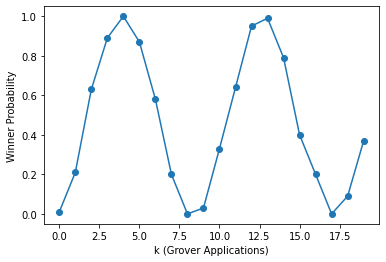

In [36]:
plt.plot(range(MaxTimes), ProbabilityWinner, 'o-')
plt.xlabel('k (Grover Applications)')
plt.ylabel('Winner Probability')

In [37]:
ListOfWinners

[31,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 19,
 30,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 25,
 17,
 17]